In [1]:
import lfw_dataset as lfw
from lfw_dataset import LFWDataLoader
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()


Data already exist


	First row - same person. second row - different persons



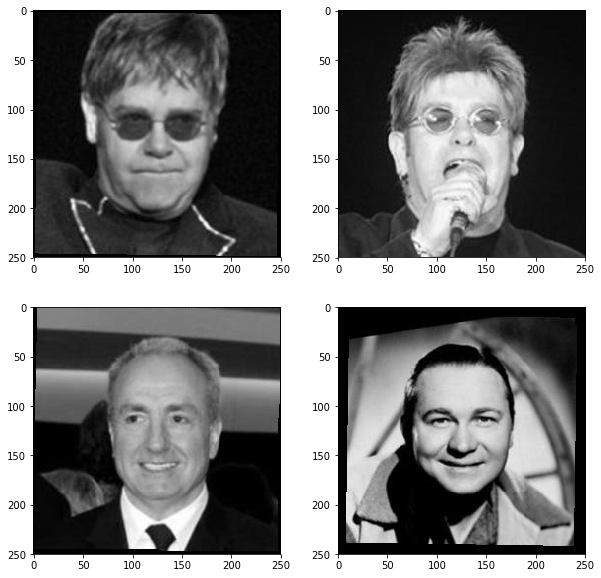

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

# lets check that same images are really same person and vise versa
random_index = np.random.randint(0, len(same_train_paths))

f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(imread(same_train_paths[random_index][0]),cmap='gray')
ax[0][1].imshow(imread(same_train_paths[random_index][1]),cmap='gray')
ax[1][0].imshow(imread(diff_train_paths[random_index][0]),cmap='gray')
ax[1][1].imshow(imread(diff_train_paths[random_index][1]),cmap='gray')
print('\tFirst row - same person. second row - different persons\n')

In [3]:
from siamese import Siamese

s_net = Siamese()

Using TensorFlow backend.


In [7]:
model_obj = s_net.init_network()
model_obj.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 4096)         605178688   input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 4096)         0           sequential_2[1][0]               
          

In [10]:
training_generator = LFWDataLoader(same_train_paths, diff_train_paths, shuffle=False)
validation_generator = LFWDataLoader(same_val_paths, diff_val_paths, shuffle=False)


In [11]:
history = model_obj.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=False, verbose=1)

Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[147456,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense_4/kernel/Initializer/random_normal/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, _class=["loc:@dense_4/kernel/Assign"], dtype=DT_FLOAT, seed=87654321, seed2=84, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_4/kernel/Initializer/random_normal/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dense_4/kernel/Initializer/random_normal/RandomStandardNormal', defined at:
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-b5ed9428817d>", line 1, in <module>
    model_obj = s_net.init_network()
  File "C:\Users\Eli\Workspace\Deep-Learning-Intro\assignment2\src\siamese.py", line 45, in init_network
    kernel_initializer=initialize_weights, bias_initializer=initialize_bias))
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 184, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 696, in __call__
    self.build(input_shapes)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\layers\core.py", line 891, in build
    trainable=True)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 460, in add_variable
    return self.add_weight(*args, **kwargs)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 534, in add_weight
    use_resource=use_resource)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\training\checkpointable\base.py", line 497, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1873, in make_variable
    use_resource=use_resource)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2234, in variable
    use_resource=use_resource)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2224, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2196, in default_variable_creator
    constraint=constraint)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 312, in __init__
    constraint=constraint)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 417, in _init_from_args
    initial_value(), name="initial_value", dtype=dtype)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1860, in <lambda>
    shape, dtype=dtype, partition_info=partition_info)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\init_ops.py", line 293, in __call__
    shape, self.mean, self.stddev, dtype, seed=self.seed)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\random_ops.py", line 77, in random_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 625, in random_standard_normal
    seed2=seed2, name=name)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\Eli\Anaconda3\envs\dlinto\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[147456,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense_4/kernel/Initializer/random_normal/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, _class=["loc:@dense_4/kernel/Assign"], dtype=DT_FLOAT, seed=87654321, seed2=84, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_4/kernel/Initializer/random_normal/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [7]:
def evaluate(model, history, X_test, y_test):
    model.summary()
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(history.history['acc'])
    axes[0].plot(history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')#%%


In [ ]:
# TODO: load test data to use evaluate or change code to use evaluate generator
evaluate(model_obj, history, X_test, y_test)
